In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

In [4]:
# Load data
os.chdir('C:\\Users\\diwak\\OneDrive\\Documents\\Machine Learning Case Studies - Term 2.2\\13. Capstone Case Study - Demand Estimation_')
data = pd.read_csv('Electricity Consumption.csv',parse_dates=['DATE'],index_col='DATE')

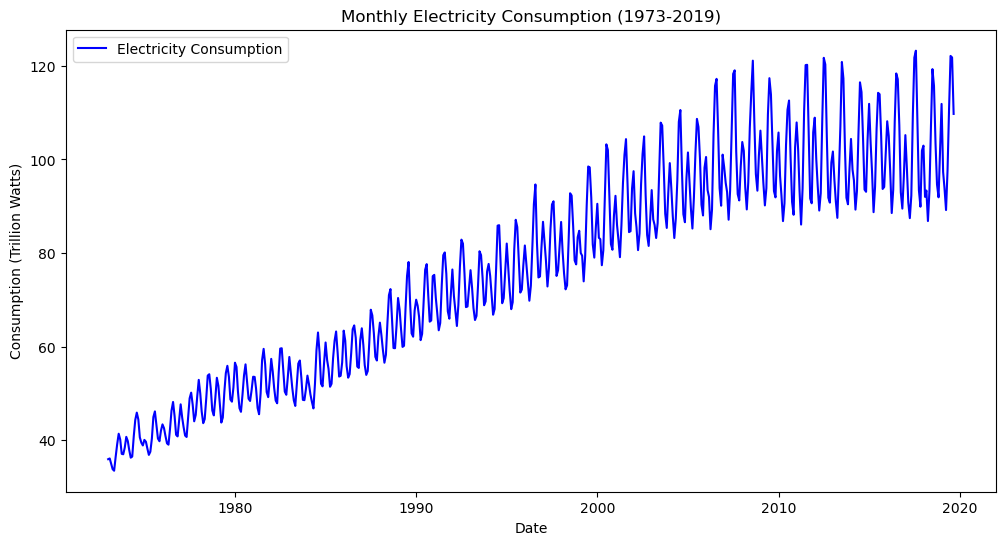

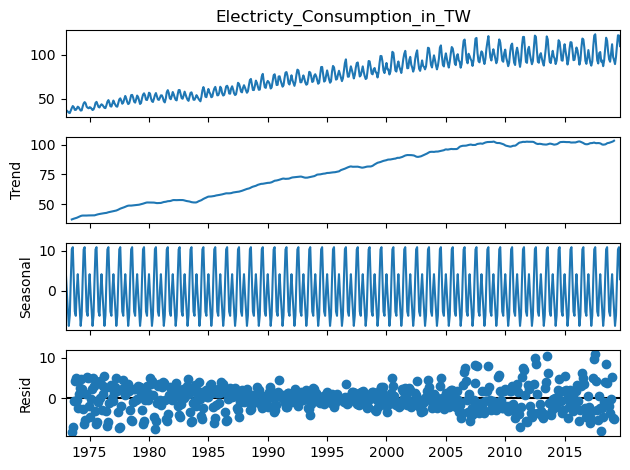

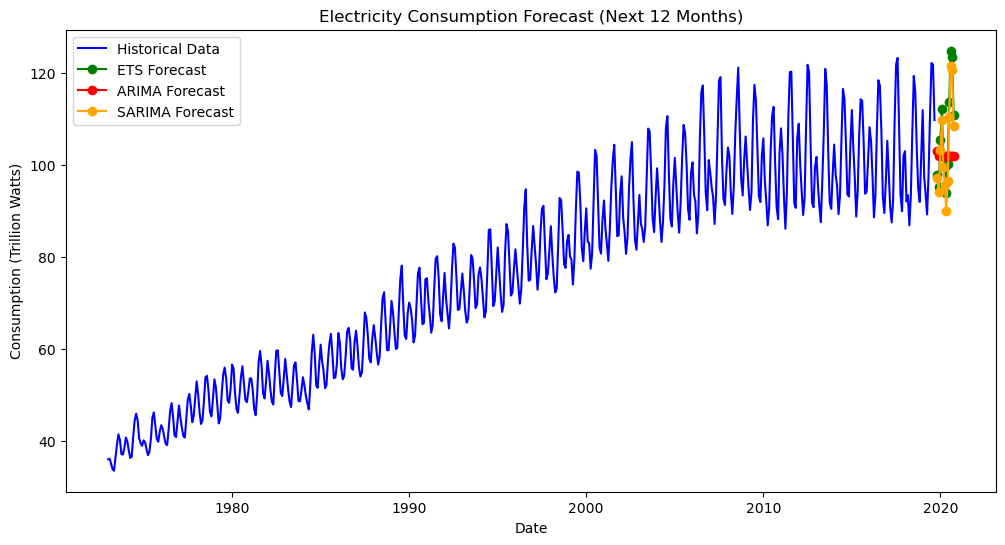

            ETS Forecast  ARIMA Forecast  SARIMA Forecast
2019-10-31           NaN             NaN              NaN
2019-11-30           NaN             NaN              NaN
2019-12-31           NaN             NaN              NaN
2020-01-31           NaN             NaN              NaN
2020-02-29           NaN             NaN              NaN
2020-03-31           NaN             NaN              NaN
2020-04-30           NaN             NaN              NaN
2020-05-31           NaN             NaN              NaN
2020-06-30           NaN             NaN              NaN
2020-07-31           NaN             NaN              NaN
2020-08-31           NaN             NaN              NaN
2020-09-30           NaN             NaN              NaN


In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Electricity Consumption', color='blue')
plt.title('Monthly Electricity Consumption (1973-2019)')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.show()

# Step 3: Decomposition
decomposition = seasonal_decompose(data['Electricty_Consumption_in_TW'], model='additive', period=12)
decomposition.plot()
plt.show()

# Step 4: ETS Model
ets_model = ExponentialSmoothing(data['Electricty_Consumption_in_TW'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Step 5: Forecast with ETS for the next 12 months
ets_forecast = ets_fit.forecast(steps=12)

# Step 6: ARIMA Model
# Using (p=1, d=1, q=1) as an example; adjust based on ACF/PACF analysis if needed
arima_model = SARIMAX(data['Electricty_Consumption_in_TW'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Step 7: Forecast with ARIMA for the next 12 months
arima_forecast = arima_fit.forecast(steps=12)

# Step 8: SARIMA Model
# Using (p=1, d=1, q=1)(P=1, D=1, Q=1, s=12); adjust based on ACF/PACF analysis
sarima_model = SARIMAX(data['Electricty_Consumption_in_TW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Step 9: Forecast with SARIMA for the next 12 months
sarima_forecast = sarima_fit.forecast(steps=12)

# Step 10: Prepare Future Index for Forecasting
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Step 11: Plotting all forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Electricty_Consumption_in_TW'], label='Historical Data', color='blue')
plt.plot(future_index, ets_forecast, label='ETS Forecast', color='green', marker='o')
plt.plot(future_index, arima_forecast, label='ARIMA Forecast', color='red', marker='o')
plt.plot(future_index, sarima_forecast, label='SARIMA Forecast', color='orange', marker='o')
plt.title('Electricity Consumption Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.show()

# Step 12: Display Forecast Values
forecast_df = pd.DataFrame({
    'ETS Forecast': ets_forecast,
    'ARIMA Forecast': arima_forecast,
    'SARIMA Forecast': sarima_forecast
}, index=future_index)

print(forecast_df)

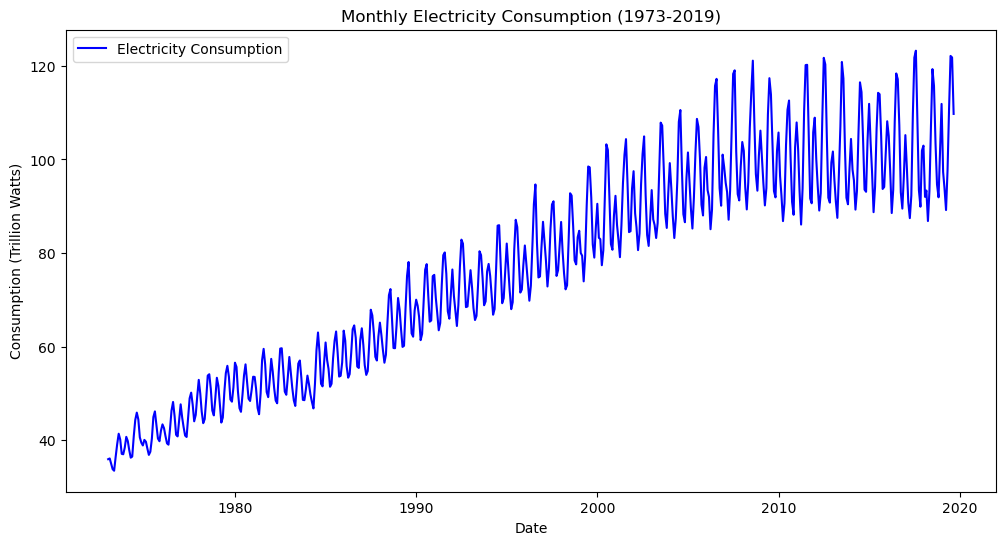

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings("ignore")

# Step 1: Load the data
data = pd.read_csv('Electricity Consumption.csv',parse_dates=['DATE'],index_col='DATE')
# Step 2: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Electricity Consumption', color='blue')
plt.title('Monthly Electricity Consumption (1973-2019)')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.show()

In [7]:
data

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


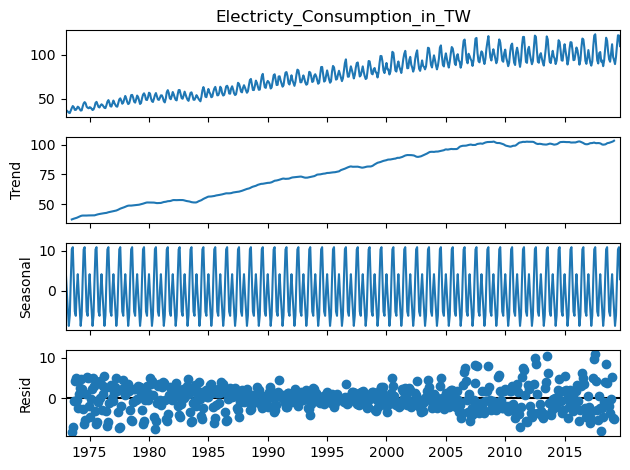

In [9]:
# Step 3: Decomposition
decomposition = seasonal_decompose(data['Electricty_Consumption_in_TW'], model='additive', period=12)
decomposition.plot()
plt.show()

In [11]:
# Step 4: ETS Model
ets_model = ExponentialSmoothing(data['Electricty_Consumption_in_TW'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()
# Step 5: Forecast with ETS for the next 12 months
ets_forecast = ets_fit.forecast(steps=12)


In [12]:
# Step 6: ARIMA Model
arima_model = SARIMAX(data['Electricty_Consumption_in_TW'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Step 7: Forecast with ARIMA for the next 12 months
arima_forecast = arima_fit.forecast(steps=12)


In [13]:
# Step 8: SARIMA Model
sarima_model = SARIMAX(data['Electricty_Consumption_in_TW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Step 9: Forecast with SARIMA for the next 12 months
sarima_forecast = sarima_fit.forecast(steps=12)


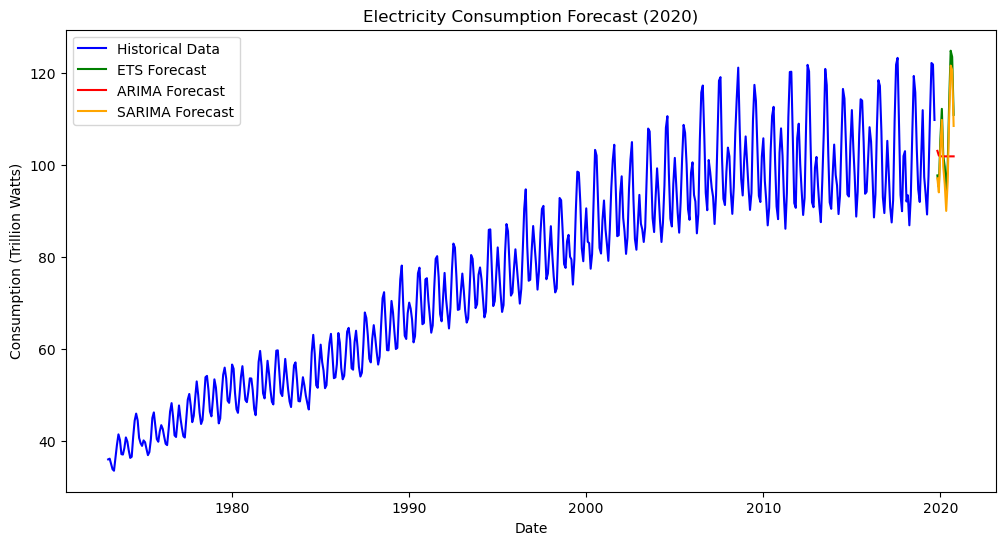

            ETS Forecast  ARIMA Forecast  SARIMA Forecast
2019-10-31           NaN             NaN              NaN
2019-11-30           NaN             NaN              NaN
2019-12-31           NaN             NaN              NaN
2020-01-31           NaN             NaN              NaN
2020-02-29           NaN             NaN              NaN
2020-03-31           NaN             NaN              NaN
2020-04-30           NaN             NaN              NaN
2020-05-31           NaN             NaN              NaN
2020-06-30           NaN             NaN              NaN
2020-07-31           NaN             NaN              NaN
2020-08-31           NaN             NaN              NaN
2020-09-30           NaN             NaN              NaN


In [14]:
# Step 10: Plotting all forecasts
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(data['Electricty_Consumption_in_TW'], label='Historical Data', color='blue')
plt.plot(future_index, ets_forecast, label='ETS Forecast', color='green')
plt.plot(future_index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(future_index, sarima_forecast, label='SARIMA Forecast', color='orange')
plt.title('Electricity Consumption Forecast (2020)')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.show()

# Step 11: Display Forecast Values
forecast_df = pd.DataFrame({
    'ETS Forecast': ets_forecast,
    'ARIMA Forecast': arima_forecast,
    'SARIMA Forecast': sarima_forecast
}, index=future_index)

print(forecast_df)

In [3]:
data

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


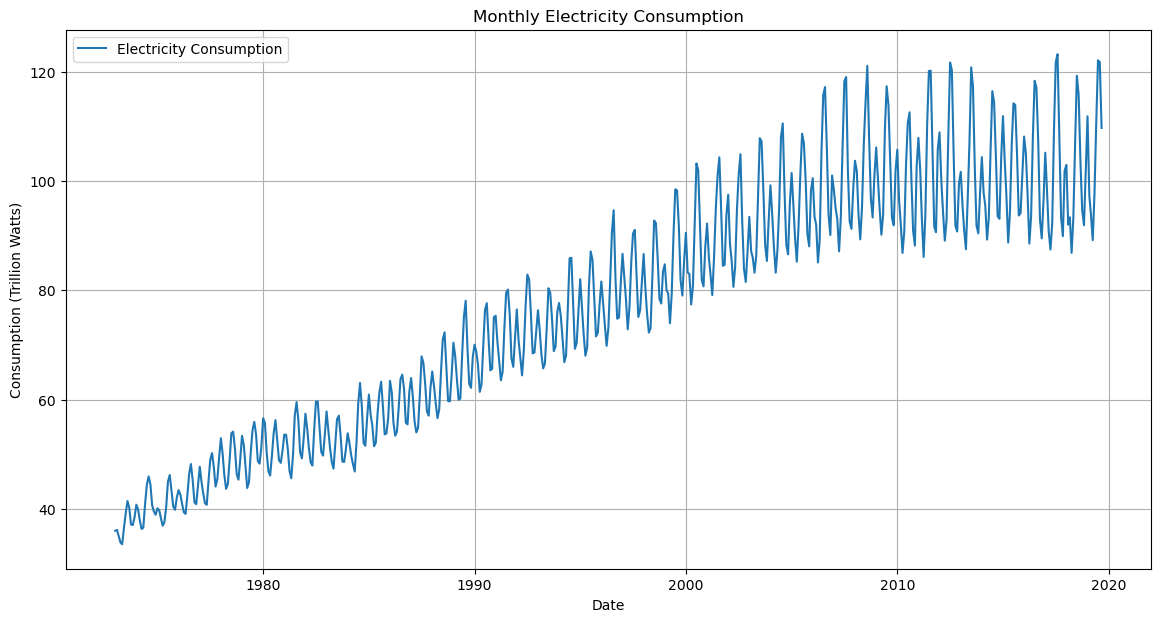

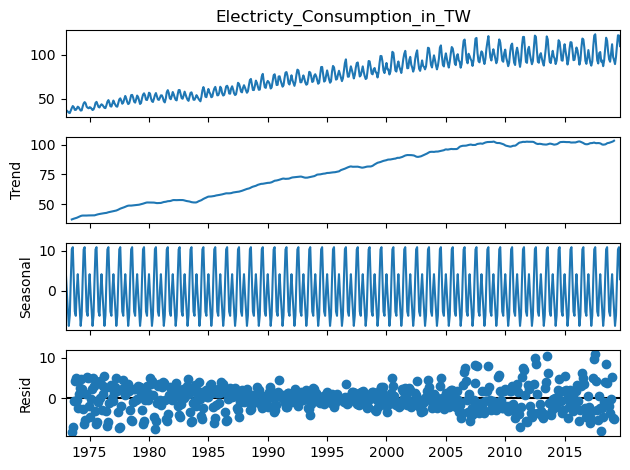

In [4]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Electricty_Consumption_in_TW'], label='Electricity Consumption')
plt.title('Monthly Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.grid()
plt.show()

# Decomposition
decomposition = seasonal_decompose(data['Electricty_Consumption_in_TW'], model='additive')
fig = decomposition.plot()
plt.show()

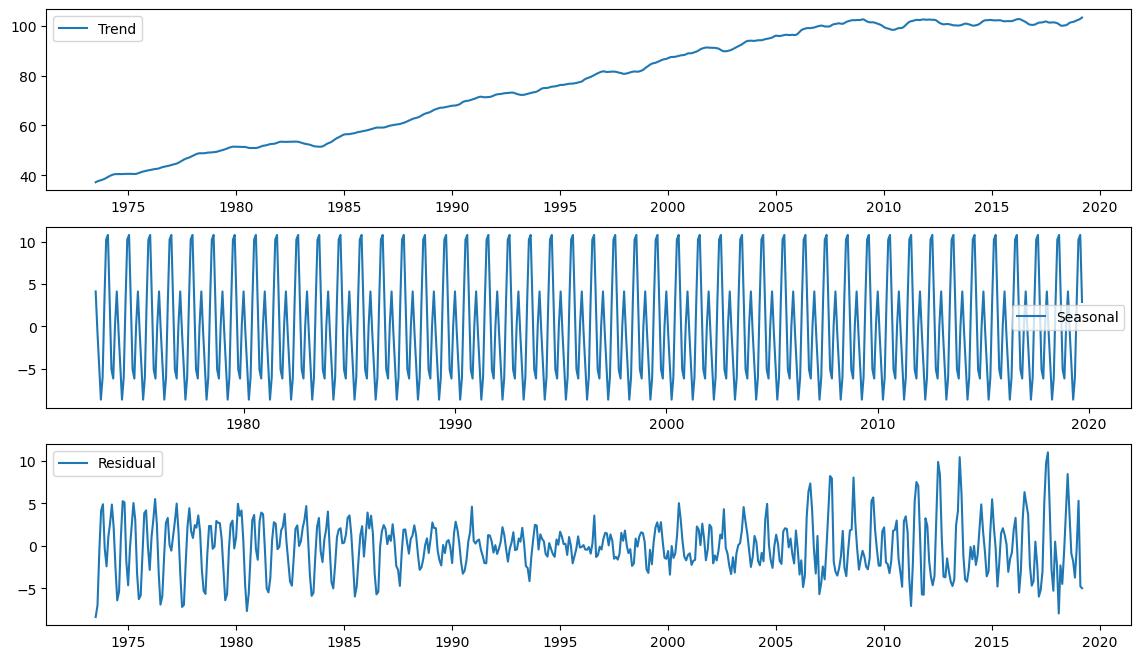

In [5]:
# Seasonal decomposition
decomposition = seasonal_decompose(data['Electricty_Consumption_in_TW'], model='additive')
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()

plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(3, 1, 3)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.show()

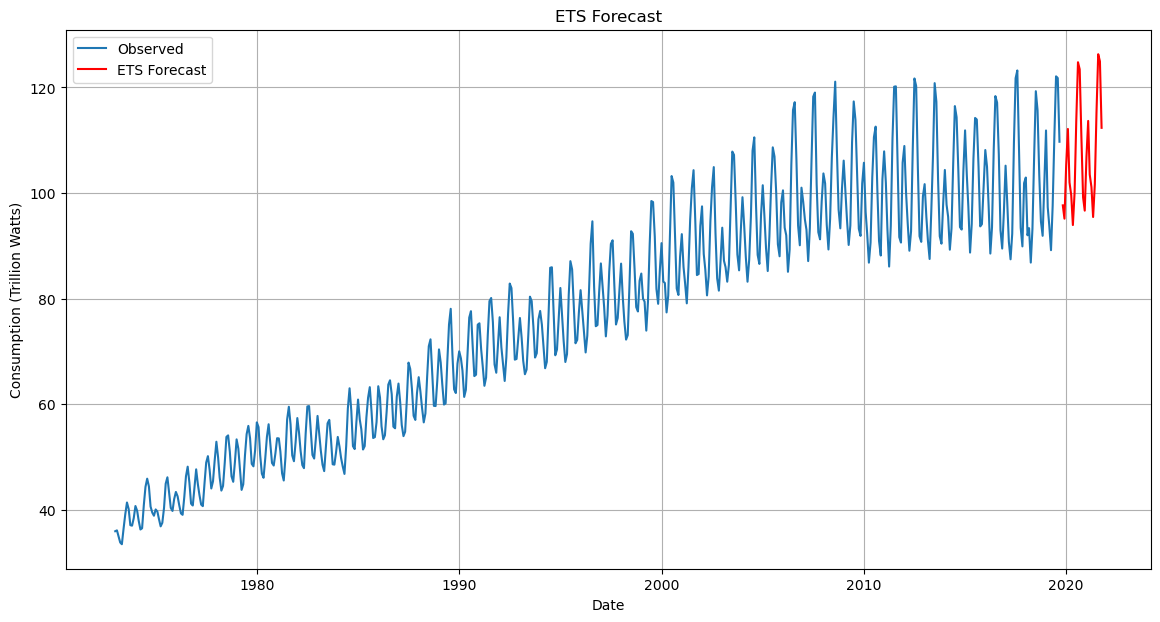

In [6]:
# ETS Model
ets_model = ExponentialSmoothing(data['Electricty_Consumption_in_TW'], 
                                 trend='add', 
                                 seasonal='add', 
                                 seasonal_periods=12).fit()
ets_forecast = ets_model.forecast(steps=24)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Electricty_Consumption_in_TW'], label='Observed')
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M'), ets_forecast, label='ETS Forecast', color='red')
plt.title('ETS Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.grid()
plt.show()

In [7]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  561
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1139.814
Date:                              Wed, 17 Jul 2024   AIC                           2291.627
Time:                                      13:51:08   BIC                           2317.595
Sample:                                  01-01-1973   HQIC                          2301.767
                                       - 09-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4283      0.066      6.460      0.000       0.298       0.558
ma.L1         -0.66

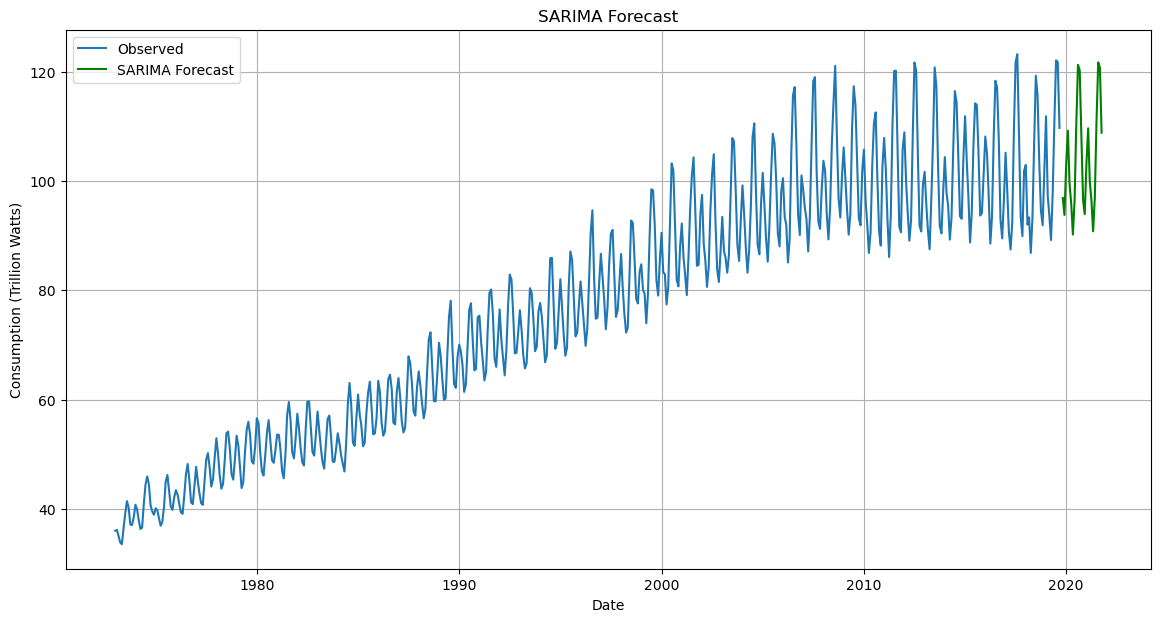

In [8]:
from pmdarima import auto_arima

# Find the best ARIMA model
model = auto_arima(data['Electricty_Consumption_in_TW'], seasonal=True, m=12, stepwise=True)
print(model.summary())

# Forecast
forecast = model.predict(n_periods=24)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Electricty_Consumption_in_TW'], label='Observed')
plt.plot(forecast_index, forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption (Trillion Watts)')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Forecast for next 1-2 years
forecast_ets = ets_model.forecast(steps=24)
forecast_sarima = forecast

# Create a DataFrame for easy viewing
forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M'),
    'ETS Forecast': forecast_ets,
    'SARIMA Forecast': forecast_sarima
})

print(forecast_df)

                 Date  ETS Forecast  SARIMA Forecast
2019-10-01 2019-10-31     97.674956        96.899353
2019-11-01 2019-11-30     95.153668        93.787443
2019-12-01 2019-12-31    105.335391       102.994069
2020-01-01 2020-01-31    112.139567       109.219414
2020-02-01 2020-02-29    101.999583        99.581245
2020-03-01 2020-03-31     99.609346        95.840490
2020-04-01 2020-04-30     93.946950        90.207167
2020-05-01 2020-05-31    100.146845        96.485816
2020-06-01 2020-06-30    113.701140       110.286699
2020-07-01 2020-07-31    124.770353       121.274414
2020-08-01 2020-08-31    123.433489       120.294220
2020-09-01 2020-09-30    110.834218       108.326944
2020-10-01 2020-10-31     99.195002        96.459767
2020-11-01 2020-11-30     96.673715        93.940861
2020-12-01 2020-12-31    106.855437       103.349144
2021-01-01 2021-01-31    113.659613       109.649534
2021-02-01 2021-02-28    103.519629       100.104629
2021-03-01 2021-03-31    101.129393        96.